<a href="https://colab.research.google.com/github/Farhan5559/PRODIGY_DS_2/blob/main/PRODIGY_DS_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Google Colab Script for Titanic EDA**

**Google Colab-Ready EDA Code**

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Ssample Titanic dataset directly from the GitHub URL
url = 'https://raw.githubusercontent.com/Prodigy-InfoTech/data-science-datasets/main/Task%202/train.csv'
df = pd.read_csv(url)

# Step 3: Display the first 5 rows to confirm it loaded correctly
print("Dataset loaded successfully! Here are the first 5 rows:")
df.head()

Dataset loaded successfully! Here are the first 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data Cleaning

In [ ]:
def create_summary_table(df):
    print(f"DataFrame Shape: {df.shape}")

    # Create a summary DataFrame
    summary = pd.DataFrame({
        'Data Type': df.dtypes,
        'Non-Null Values': df.count(),
        'Missing Values': df.isnull().sum(),
        'Missing %': (df.isnull().sum() / len(df)) * 100,
        'Unique Values': df.nunique()
    }).sort_values(by='Missing %', ascending=False)

    # Format the 'Missing %' column to one decimal place
    summary['Missing %'] = summary['Missing %'].map('{:.1f}%'.format)

    return summary

data_summary = create_summary_table(df)

print("\n--- Data Summary & Missing Values ---")
display(data_summary)

print("\n--- Statistical Overview (Numerical & Categorical) ---")
display(df.describe(include='all').transpose())

DataFrame Shape: (891, 12)

--- Data Summary & Missing Values ---


,Data Type,Non-Null Values,Missing Values,Missing %,Unique Values
Cabin,object,204,687,77.1%,147
Age,float64,714,177,19.9%,88
Embarked,object,889,2,0.2%,3
PassengerId,int64,891,0,0.0%,891
Name,object,891,0,0.0%,891
Pclass,int64,891,0,0.0%,3
Survived,int64,891,0,0.0%,2
Sex,object,891,0,0.0%,2
Parch,int64,891,0,0.0%,7
SibSp,int64,891,0,0.0%,7



--- Statistical Overview (Numerical & Categorical) ---


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


Exploratory Data Analysis (EDA)

Gender vs Survival

--- Pivot Table: Survival Rate by Gender ---
        Survived
Sex             
female  0.742038
male    0.188908


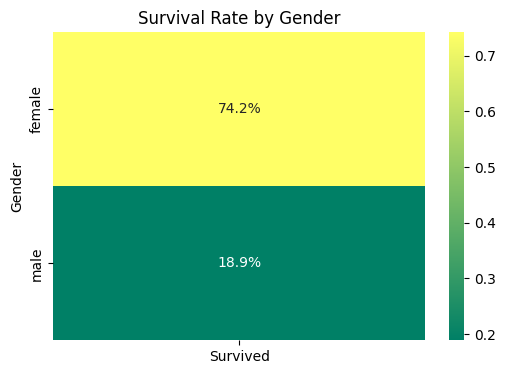

In [ ]:
gender_survival_rate = df.pivot_table(
    values='Survived',
    index='Sex',
    aggfunc='mean'
)

print("--- Pivot Table: Survival Rate by Gender ---")
print(gender_survival_rate)


# Step 2: Visualize the pivot table with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(
    gender_survival_rate,
    annot=True,
    fmt='.1%',
    cmap='summer'
)

plt.title('Survival Rate by Gender')
plt.ylabel('Gender')
plt.show()

**assenger Age Frequency**

--- Analysis of Age Distribution ---


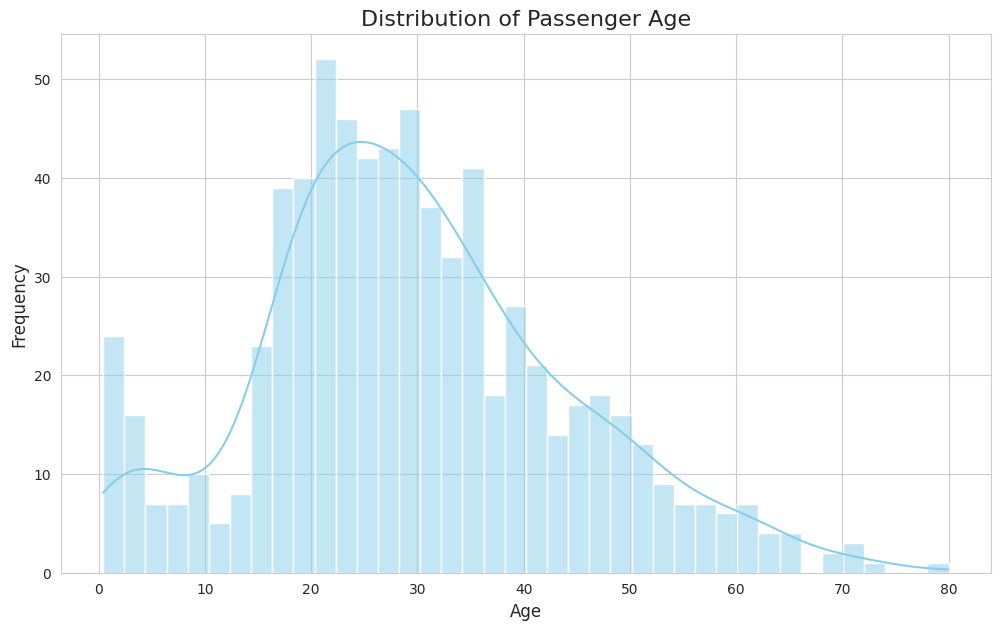


--- Analysis of Fare Distribution ---


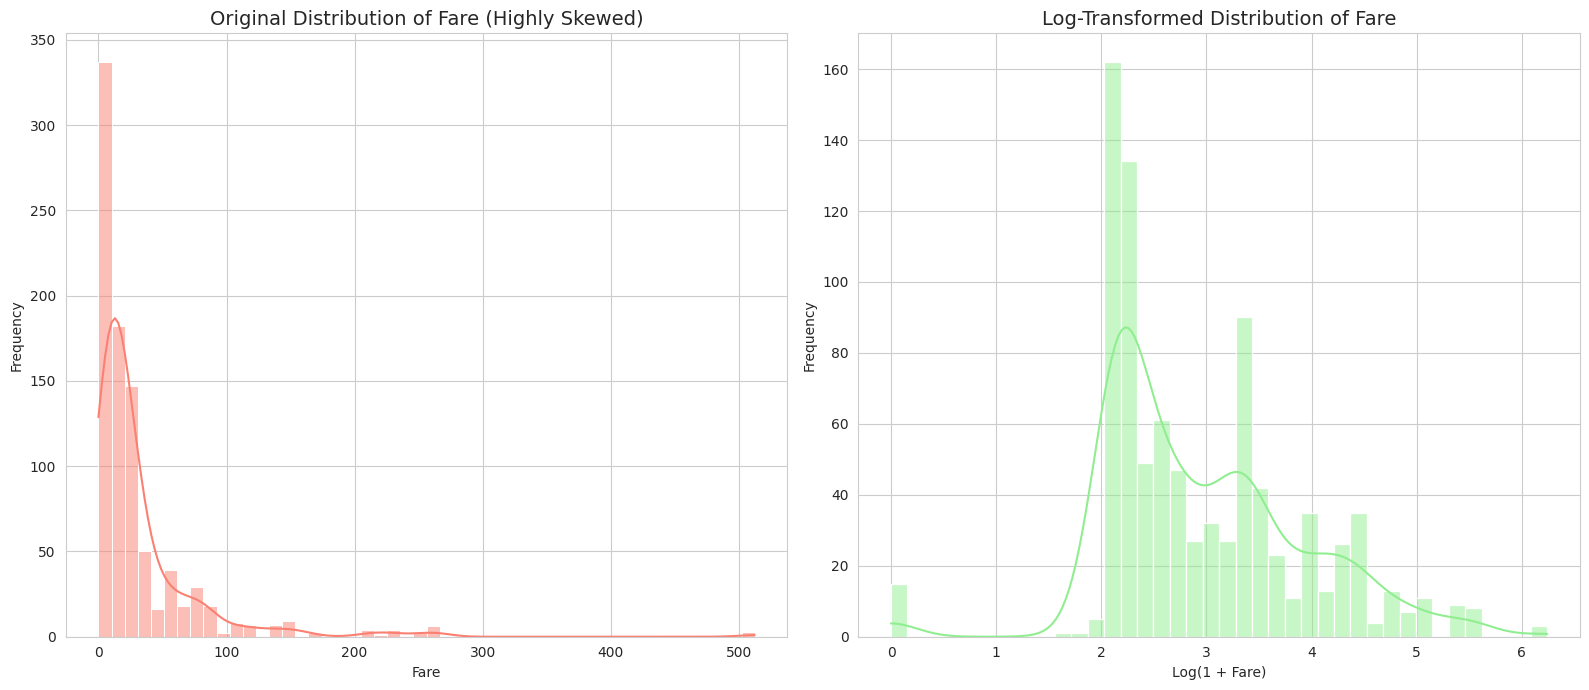

In [ ]:

sns.set_style("whitegrid")


# --- Visualization for 'Age' Distribution ---
print("--- Analysis of Age Distribution ---")
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='Age', kde=True, bins=40, color='skyblue')
plt.title('Distribution of Passenger Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()



print("\n--- Analysis of Fare Distribution ---")
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
sns.histplot(data=df, x='Fare', kde=True, bins=50, color='salmon', ax=axes[0])
axes[0].set_title('Original Distribution of Fare (Highly Skewed)', fontsize=14)
axes[0].set_xlabel('Fare')
axes[0].set_ylabel('Frequency')

sns.histplot(np.log1p(df['Fare']), kde=True, bins=40, color='lightgreen', ax=axes[1])
axes[1].set_title('Log-Transformed Distribution of Fare', fontsize=14)
axes[1].set_xlabel('Log(1 + Fare)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**Pclass vs Survival**

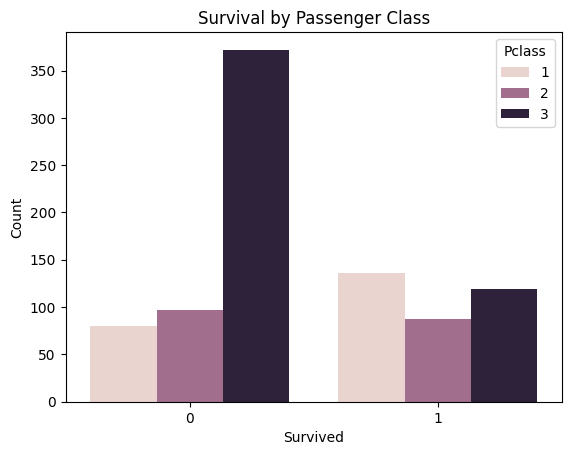

In [ ]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survival by Passenger Class")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.legend(title='Pclass')
plt.show()


**Age Distribution**

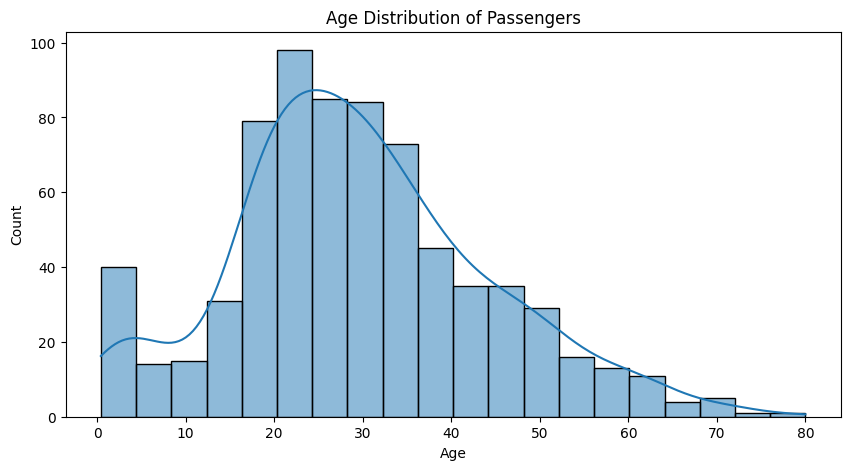

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

**Age vs Survival**

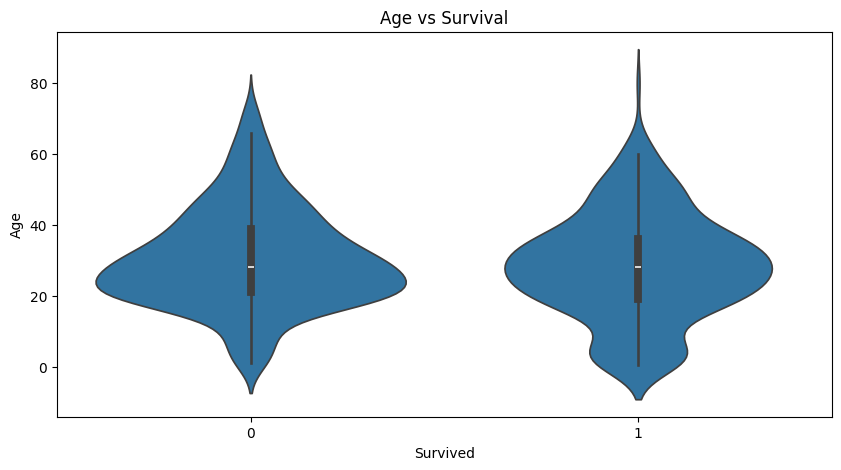

In [ ]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survival")
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()

**Fare Vs Survival**

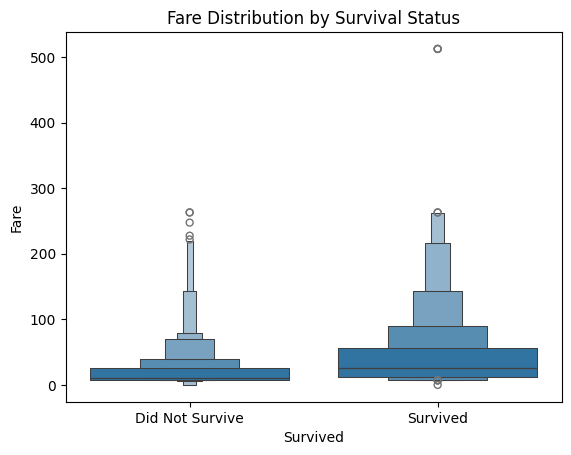

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Create and show the boxenplot
sns.boxenplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival Status')
plt.xticks(ticks=[0, 1], labels=['Did Not Survive', 'Survived'])
plt.show()

**Correlation Heatmap**

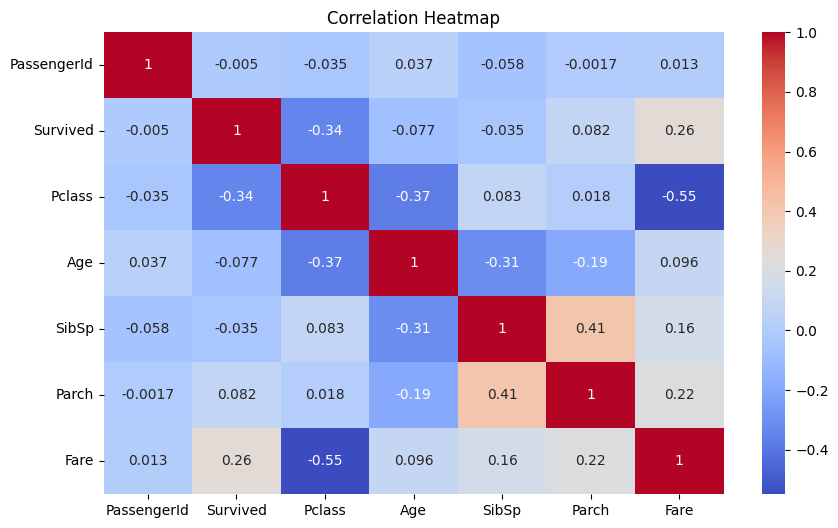

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()